In [142]:
import matplotlib.pyplot as plt
import numpy as np
import random as rd

In [143]:
from sklearn.metrics import r2_score

# Linear Model to fit the curve

In [144]:
alpha = 0.05

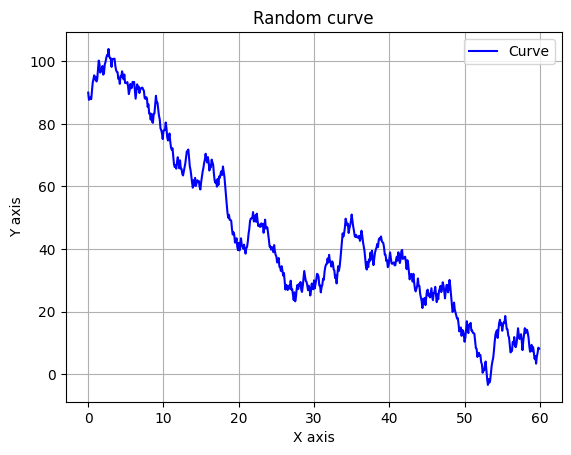

In [195]:
X = np.arange(0, 60, 0.1).reshape(-1, 1)
Y = []
y = rd.randint(50, 100)
for i in range(len(X)):
    y += rd.uniform(-3, 3)
    Y.append(y)


plt.plot(X, Y, color='b', label='Curve')
plt.xlabel("X axis")
plt.ylabel("Y axis")
plt.title("Random curve")
plt.grid()
plt.legend()
plt.show()


In [185]:
from sklearn.linear_model import LinearRegression

In [196]:
print(len(X))
print(X.shape)

600
(600, 1)


In [197]:
LR = LinearRegression()
LR.fit(X[:450], Y[:450])

LinearRegression()

In [198]:
a = LR.coef_
b = LR.intercept_

y_pred_LR = LR.predict(X)

print(f"R2 score on the trained part of the curve of {r2_score(Y[:450], y_pred_LR[:450])}")
print(f"R2 score on the untrained part of the of {r2_score(Y[450:], y_pred_LR[450:])}")
print(f"Coefficient: {a}")
print(f"Intercept: {b}")

R2 score on the trained part of the curve of 0.7971758350917965
R2 score on the untrained part of the of -0.5881703394250348
Coefficient: [-1.63262806]
Intercept: 91.51223577911861


### Adding a prediction interval

In [210]:
# Prediction region

res = Y - y_pred_LR
qt = np.quantile(res, 1 - alpha)

# Need to check type of qt

upper_LR = [y_pred_LR[i] + qt if qt > 0 else y_pred_LR[i] - qt for i in range(len(y_pred_LR))]
lower_LR = [y_pred_LR[i] - qt if qt > 0 else y_pred_LR[i] + qt for i in range(len(y_pred_LR))]

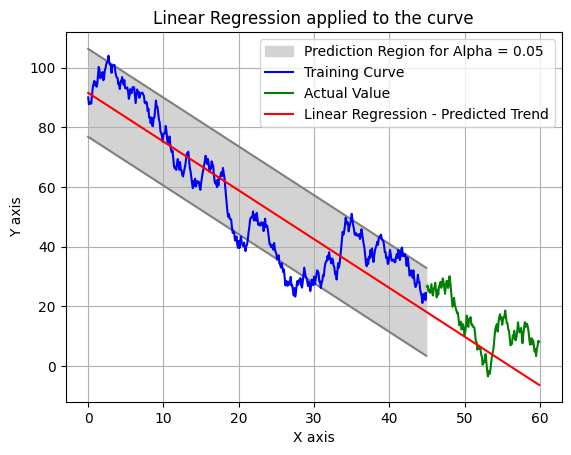

In [211]:
lr = []
for i in range(len(X)):
    lr.append(a*X[i] + b)

plt.plot(X[:450], upper_LR[:450], color='grey')
plt.plot(X[:450], lower_LR[:450], color='grey')
plt.fill_between(X.reshape(-1)[:450], upper_LR[:450], lower_LR[:450], color='lightgrey', label=f'Prediction Region for Alpha = {alpha}')
plt.plot(X[:450], Y[:450], color='b', label='Training Curve')
plt.plot(X[450:], Y[450:], color='g', label='Actual Value')
plt.plot(X, lr, color='r', label='Linear Regression - Predicted Trend')
plt.xlabel("X axis")
plt.ylabel("Y axis")
plt.title("Linear Regression applied to the curve")
plt.grid()
plt.legend()
plt.show()


# Non-linear model to fit the curve - Multi Linear Perceptron Regression

In [201]:
from sklearn.neural_network import MLPRegressor

MLPR = MLPRegressor(hidden_layer_sizes=(1500, 750, 500, 250, 100, 10), activation="relu",
                 solver='adam', alpha=0.0001,
                 batch_size='auto', learning_rate="constant",
                 learning_rate_init=0.001,
                 max_iter=1000,tol=1e-4)
MLPR.fit(X[:450], Y[:450])


MLPRegressor(hidden_layer_sizes=(1500, 750, 500, 250, 100, 10), max_iter=1000)

In [202]:
y_pred_MLP = MLPR.predict(X)

In [203]:
print(f"R2 score on the trained part of the curve (0 <= X <= 100): {r2_score(Y[:450], y_pred_MLP[:450])}")
print(f"R2 score on the untrained part of the curve (100 <= X <= 200): {r2_score(Y[450:], y_pred_MLP[450:])}")

R2 score on the trained part of the curve (0 <= X <= 100): 0.9310838295997571
R2 score on the untrained part of the curve (100 <= X <= 200): -5.005435229582214


In [204]:
# Confidence region

res = Y - y_pred_MLP
qt = np.quantile(res, 1 - alpha)

# Need to check type of qt

upper_LR = [y_pred_MLP[i] + qt if qt > 0 else y_pred_MLP[i] - qt for i in range(len(y_pred_MLP))]
lower_LR = [y_pred_MLP[i] - qt if qt > 0 else y_pred_MLP[i] + qt for i in range(len(y_pred_MLP))]

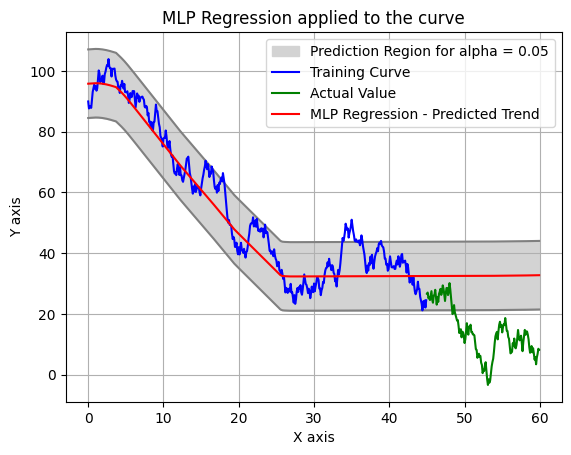

In [208]:
plt.plot(X, upper_LR, color='grey')
plt.plot(X, lower_LR, color='grey')
plt.fill_between(X.reshape(-1), upper_LR, lower_LR, color='lightgrey', label=f'Prediction Region for alpha = {alpha}')
plt.plot(X[:450], Y[:450], color='b', label='Training Curve')
plt.plot(X[450:], Y[450:], color='g', label='Actual Value')
plt.plot(X, y_pred_MLP, color='r', label='MLP Regression - Predicted Trend')
plt.xlabel("X axis")
plt.ylabel("Y axis")
plt.title("MLP Regression applied to the curve")
plt.grid()
plt.legend()
plt.show()


The predictions are too hasardous. Sometimes they fit, sometimes not at all. We need to find a more reliable model. Of course, we didn't work on the data itself before, so we can't be expected too good and reliable results.